$\newcommand{\rads}{~rad.s$^{-1}$}$
$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\textrm{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\textrm{and}\quad}$
$\newcommand{\oreq}[0]{\quad\textrm{or}\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

# Introduction

This chapter will delve deeper into what waves really do: they travel.
The previous chapter on standing waves provided a useful mathematical description that is widely used, but not always useful.
That's because these waves don't go anywhere, and waves are one of the main tools, Physics uses to move information around.
Most detection devices such as eyes or ears use waves that have travelled from wherever we look or hear towards, and so on.
As we will see, both points of views (standing vs. travelling) are two ways of looking at the same thing.

The demo for this chapter is tiny: it's just me, trying to whip the rubber hose to create a disturbance (with moderate success, I have to admit). See below (Jupyter), also at https://youtu.be/4uZecocmN3w or https://play.library.utoronto.ca/aef20263acb3529805746d6f63d6ed71.

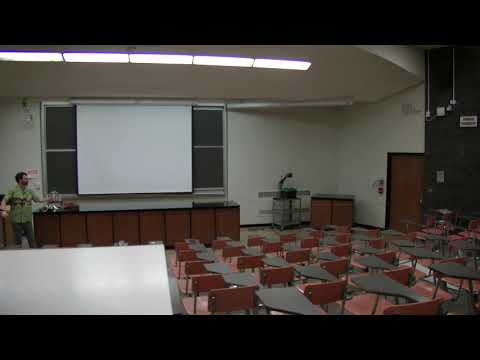

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('4uZecocmN3w')

While there is no excuse for my poor handling of the rubber hose, there are a couple of good reasons why there are fewer and fewer videos: first, the concepts are increasingly common: we have all seen ripples in a puddle, or longer waves on larger bodies of water.
They are also increasingly abstract: sthe propagation of sound waves or light are everyday waves, and yet, their wavy features cannot easily be observed.
We will also study how waves propagate across discontinuities (say, two different pieces of strings), which is hard to easily observe because we need a type of wave that propagates slowly enough to be captured by the naked eye, and the physics department did not have that sort of device in store.

Note that the chain of linked pendulums that I showed at the end of chapter 4 and beginning of chapter 5 eatured propagating waves.
I re-post the links below.

# Expectations

## Remember

* The wave equation $\pdenl2{y}t = v^2\pdenl2y{x}$,
* $y(x, t) = f(x - vt) + g(x+vt)$ is the general solution to the equation above.
* $v = \omega/k$ in priority; $v = \nu\lambda$ can be easily recovered from the previous equation, but it can be useful to remember is as such.
* When boundaries are a relevant concept, travelling waves can be decomposed as a sum of standing wave modes of the cavity.
* A standing wave mode can be interpreted as the superposition of two travelling waves of equal amplitude, equal frequencies and equal-and-opposite travelling speeds.
* For a sine wave, the energy in one wavelength is $\left<E\right> = \frac12 \mu \lambda A^2\omega^2$. Remember it by recalling that $E = kA^2/2= m\omega_0^2 A^2/2$ for a SHO.
* Any discontinuity in the value of the phase speed can lead to a reflection/transmission phenomenon.

## Understand

* What it means for $y(x, t) = f(x - vt) + g(x+vt)$ to be the general solution to the wave equation. In particular, that it can be any shape when $v$ is constant. (when $v$ depends on frequency or wave number, wave forms may evolve in time, as we will see in the next chapter)
* $f(x-vt)$ is the part of the solution that travels towards $x>0$, $g(x+vt)$ the one that travels towards $x<0$. 
* The process of reflection and transmission; the simple case we saw applies to many waves with normal incidence.

## Apply

* How to deduce the power, crossing a certain location, from the energy contained in one wavelength.
* Know how to treat the wave equation in more than one dimension ($\partial_t^2y=v^2\laplb y$)
* And as usual, complete this list with worked examples, tutorials and problem sets.

# Travelling Waves as Superpositions of Modes

Recall the video below, which I start here at the moment when I talk about travelling waves (also at https://youtu.be/Ki70ShYFtmA?t=193 and https://play.library.utoronto.ca/c4febe4cb2b4b0e8ee5641ffa524b24f?t=193): a chain of discrete oscillators can look like a standing wave, but also appears to  be able to support travelling waves.

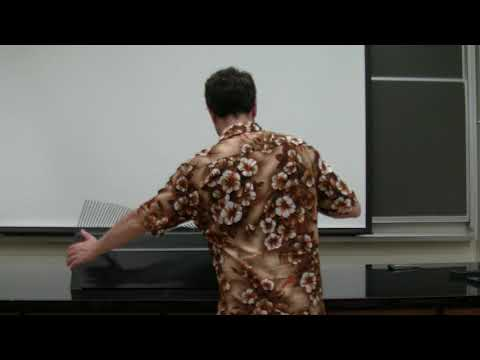

In [14]:
YouTubeVideo('Ki70ShYFtmA', start=193)

From chapters 4 and 5, we know that the motion, whatever it is, can be decomposed as a sum of modes.
Yes, this decomposition seems awkward here, when I send disturbance pulses down the chain of oscillators.
Indeed, it feels like we could write the travelling motion as a more simple function that translates itself in space, with time.
In this section, I show that indeed, you could do both.

I will illustrate numerically here how the same code I used in the previous chapter to animate the plucked string can support travelling disturbances.
Recall that the code basically consisted of projecting an initial position onto modes, animating these modes in time, and summing them to obtain an approximate solution to the time evolution of the string.

I now do the same with and initial, gaussian-shaped perturbation:
$$ y(0, x) = d\exp\left[-\frac{(x-L/2)}{2\sigma_x^2}\right],$$
with $\sigma_x = L/20$ (see fig. 1).

I also set $\dot y(0, x) = 0$ (no initial velocity).
As a result, the initial bump does not have a propagation direction.
It splits into two bumps, with equal amplitudes of $1/2$ each and opposite travel directions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# the following two packages allow me to display the animation
from matplotlib import animation
from IPython.display import HTML
# More about animations: 
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [4]:
L = .33  # length of string: 33 cm
T = 68  # tension in the string: 68 N
mu = 0.125/L  # mass per unit lenght of the string
ftsz = 13

x = np.linspace(0., L, 128)  # the x array
v = np.sqrt(T/mu)  # phase speed
k0 = np.pi/L  # the fundamental k; k_n = n*k0 and omega_n = n*v*k0

In [5]:
xp = 0.1*L  # the point where the string is plugged

y_approx = 0*x  # this will be the sum of thre first N modes
sigma_x = 0.05*L
x_bump = 0.5*L
y_init = np.exp(-(x - x_bump)**2/(2*sigma_x**2))
# y_init = x/xp  # the first part of the string; I will deivide all y's by d
# y_init[x > xp] = (L - x[x > xp]) / (L - xp)  # the 2nd part

fig = plt.figure()
plt.plot(x/L, y_init, 'r')
plt.xlabel('$x/L$', fontsize=ftsz)
plt.ylabel('$y(0, x)/d$', fontsize=ftsz)
plt.title('The string at $t=0$', fontsize=ftsz)
plt.ylim([0., 1.1])
plt.grid()
plt.tight_layout()
plt.savefig('InitialString.png', dpi=100)
plt.close()

![Fig. 1: Initial shape of the string](InitialString.png)

In [6]:
N = 32

k = [n*k0 for n in range(1, N+1)]  # the list of k's
omega = [n*k0*v for n in range(1, N+1)]  # the list of omega's

mode = {}  # all modes stored in a dictionary
alpha = [0.]  # alpha coefficients stored in list

# plotting the spectrum
for n in range(1, N+1):
    # projection happens on line below!!!
    alpha.append(2. * np.trapz(y_init*np.sin(n*np.pi*x/L), x) / L)
    mode[n] = alpha[n] * np.sin(n*np.pi*x/L)
    y_approx += mode[n]
    
plt.figure()
for n in range(1, N+1):
    plt.plot([n]*2, [0., alpha[n]], 'o-', linewidth=5)
plt.axis([0, N+0.5, 1.1*min(alpha), 1.1*max(alpha)])
plt.axhline(0., color='k')
#plt.xticks(range(1, N+1), 
#          ['$\omega_{0:1d}$'.format(n) for n in range(1, N+1)],
#          fontsize=ftsz)
plt.xlabel('Harmonic number $n$ ($\omega_n = n\pi v/L$)', fontsize=ftsz)
plt.ylabel(r'Modal amplitude $\alpha_n/d$', fontsize=ftsz)
plt.grid()
plt.tight_layout()
plt.savefig('InitialSpectrum.png', dpi=100)
plt.close()

![Fig. 2: Initial spectrum of the string](InitialSpectrum.png)

We see on the spectrum of this initial condition (fig. 2) that the modal amplitudes $\alpha_n$ decay, but not as fast as before: we need more modes before reaching a satisfying approximation of the solution.
We will animate the solution, truncating it to its first 32 modes.

In [7]:
# Various quantities
imagelist = []  # list of frames to eventually animate

t_end = 2.*np.pi/omega[0]
n_frames = 100  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array

# Animation
fig = plt.figure(dpi=100)
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([-1.1, 1.1])
ax.set_xlabel('$x/L$', fontsize=ftsz)
# ax.set_yticks(range(0, N+1))
# ax.set_yticklabels(['$tot$', '1', '2', '3', '4'])
ax.set_ylabel('$y(t, x)/d$', fontsize=ftsz)
ax.grid()

for t in time: # We loop over time to animate the modes
    y = 0*x  # nx positions for N modes
    for n in range(N):
        y += mode[n+1]*np.cos(omega[n]*t)

    im = plt.scatter(x/L, y, c='b')#c=y, cmap='copper')
    imagelist.append([im])
    
plt.tight_layout()
    
# Creation of the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=40, blit=True, repeat_delay=80)
plt.close()

In [8]:
# Show the animation
HTML(ani.to_html5_video())

In [9]:
# Save the animation
ani.save('InitialBump.mp4')

(Animation saved under ```InitialBump.mp4```)
These are just a bunch of independent modes, doing their own things!

# Travelling Solutions to the Wave Equation

Recall that the wave equation is
$$ \boxed{\pden2{y}t = v^2\pden2y{x}}.\hspace{5cm}(1)$$

## The Decomposition into Leftward and Rightward-Propagating Waves

*[King § 5.2]*

In this chapter we will ignore the existence of walls.
In this context, the variable separation technique, while still valid, does not provide much useful information.
Instead, I will show that the most general solution to the wave equation, $(1)$, is
$$ y(x, t) = f(x - vt) + g(x+vt).\hspace{5cm}(2) $$

The beauty of this solution is that *any* function that can be written as $f(x-v t)$ or $g(x+vt)$, i.e., as a univarate function of $x-vt$ or $x+vt$, or a combination of both, is a solution of $(1)$.
But first, let me describe what it entails to be either $f(x-v t)$ or $g(x+vt)$.

Imagine your favourite function $f(x)$.
Now, picture $f(x-1)$: it is the same shape of the curve, but translated by one to the right.
Same for $f(x+1)$: it is the same, just translated to the left by one.
In either case, if I redefine the origin of $x$ to be one to the right or to the left, the curve will be back to its original position.

Now, picture $f(x-vt)$: you should be picturing the same curve, but translating progressively to the right with time, at a speed $v$.
For the $g(x+vt)$ case, you should be picturing a curve $g(x)$, translating to the left with speed $v$.
**The decomposition of any solution into** $\bs{f(x-v t)}$ **and** $\bs{g(x+vt)}$ **corresponds to a decomposition into right- and leftward propagating waves, respectively.**

King (figs. 5.3 to 5.5) illustrates this point rather well.

![](King53.png)

![](King54.png)

![](King55.png)

The main travelling function we will encounter will be the travelling sinusoidal wave, as animated below (saved under ```LeftAndRight.mp4```), and for which
$$ y(x, t) = A\sin\left(\frac{2\pi}{\lambda}(x \pm vt)\right) = A\sin\left(k(x \pm vt)\right) = A\sin\left(\omega\left(\frac{x}{v} \pm t\right)\right)= A\sin\left(kx \pm \omega t\right). $$

Again, 

* $\lambda$ is called the **wavelength** of the wave, which corresponds to the spatial period of the wave (the distance between two consecutive maxima or minima),
* $k$ is its **wavenumber**, 
* $\omega$ its **angular frequency** and
* $2\pi/\omega$ its **period** (the duration between two consecutive maxima or minima, at the same location).

The following relations can be useful:
$$\boxed{v = \frac{\omega}{k} = \lambda\nu}.$$
(the last letter is a "nu", $\nu \neq v$)

In [10]:
# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([-1.1, 4.1])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks([0., 3.])
ax.set_yticklabels([r'$\sin(kx - \omega t)$', r'$\sin(kx + \omega t)$'],
                  fontsize=ftsz, rotation='vertical')
ax.grid()

imagelist = []

k = 4*np.pi/L

for t in time: # We loop over time to animate the modes
    y = 0*x  # nx positions for N modes
    f = np.sin(k*(x - v*t))
    g = np.sin(k*(x + v*t)) + 3

    y = np.vstack((f, g))
    x_scat = np.vstack((x, x))
    im = plt.scatter(x_scat/L, y, c=y, cmap='copper')
    imagelist.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=100, blit=True, repeat_delay=80)
plt.close()

In [11]:
# Show the animation
HTML(ani.to_html5_video())

In [12]:
# Save the animation
ani.save('LeftAndRight.mp4')

## Solutions to the Wave Equation

I now prove my early claim that eqn. $(2)$ is the general solution to the wave eqn. $(1)$.
In a first time, I will focus on $f(x-vt)$.

Let us change variables to $u = x-vt$, therefore, the only dependence of $f$ is on $u$: $f(u)$. Then,
$$ \pde{f}{x} = \pde{u}x\ode{f}u = \ode{f}u.$$

Likewise,
$$\pden2fx = \pde{u}x\oden2{f}u = \oden2{f}u.$$

For time, we have
$$\pde{f}t = \pde{u}t\ode{f}u = -v\ode{f}u \andeq \pden2{f}t = v^2\oden2{f}u,$$
and therefore,
$$\pden2{f}t = v^2\pden2{f}x.$$

A very similar succession of steps, with $u=x+vt$ this time, yields
$$\pden2{g}t = v^2\pden2{g}x.$$

Finally, for $y(x, t) = f(x-vt) + g(x+vt)$, linearity of the equations derived above implies that
$$\pden2{y}t = v^2\pden2{y}x.$$

This is true for *any* function, which can take the same form as eqn. (2).
We have not made any assumption about which functions were in $f$ and $g$: they can be sinusoidal travelling waves, they can be bumps, or anything else.
In fact, $y(x, t) = f(x-vt) + g(x+vt)$ is the most general solution to the wave equation.

# One Standing Wave as a Superposition of Two Counter-Propagating Waves

*[King §6.2]*

Take one single standing wave on a string, attached to both ends:
$$y_n(t, x) = C_n\cos(\omega_n t)\sin(k_n x),$$
and recall that
$$\sin(a)\cos(b) = \frac12\left(\sin(a+b) + \sin(a-b)\right).$$

Therefore, 
\begin{align*}
y_n(x, t) & = \frac{C_n}{2}\left(\sin(k_n x + \omega_n t) + \sin(k_n x - \omega_n t)\right) \\
          & = \frac{C_n}{2}\left(\sin k_n(x + v t) + \sin k_n(x - v t)\right).
\end{align*}
A standing wave mode can be interpreted as the superposition  of a leftward and a rightward wave!
**The standing and travelling wave representations are equivalent** (see animation saved under `LeftPlusRightEqualStanding.mp4`).

In [39]:
# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([-2.1, 13.1])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks([0., 4., 8., 12.])
ax.set_yticklabels([r'$f + g$',
                    r'$f$ and $g$',
                    r'$g(x + v t)$',
                    r'$f(x - v t)$'],
                    fontsize=ftsz)
ax.grid()

imagelist = []

k = 4*np.pi/L

for t in time: # We loop over time to animate the modes
    y = 0*x  # nx positions for N modes
    # f and g were defined in the previous animation
    f = np.sin(k*(x - v*t))
    g = np.sin(k*(x + v*t))
    y = f + g

    y_scat = np.vstack((f+12, g+8, f+4, g+4, y))
    x_scat = np.vstack((x, x, x, x, x))
    im = plt.scatter(x_scat/L, y_scat, c=y_scat, cmap='copper')  #'b')
    plt.tight_layout()
    imagelist.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=100, blit=True, repeat_delay=80)
plt.close()

In [40]:
# Show the animation
HTML(ani.to_html5_video())

In [41]:
# Save the animation
ani.save('LeftPlusRightEqualStanding.mp4')

***

*End of 13 October lecture, beginning of 14 October lecture.*

***

# Energy

[*King, §§ 5.5, 5.6*]

## Energy in a Wave

In the last chapter, we saw (without derivation) that the energy in the wave over a stretch of length $\lambda$ is
$$\left<E\right> = \left<K\right> + \left<U\right>, \quad \textrm{with}\quad K = \frac12\mu\left(\pde yt\right)^2,\quad U = \frac12\mu v^2\left(\pde yx\right)^2,$$
the kinetic and potential energy densities (i.e., per unit length), respectively, and $\left<\right>$ denotes integration over one wavelength:
$$\left<f\right>=\int_0^\lambda f(x)\di x.$$

Taking the example of $y(x, t) = A\cos(kx - \omega t)$, we have
$$\pde yt = \omega A\sin(kx - \omega t)\andeq \pde yx = -k A\sin(kx - \omega t).$$

$$\Rightarrow \quad \left<K\right> + \left<U\right> = \frac12\mu A^2 \int_0^\lambda (\omega^2 + v^2k^2)\sin^2(kx-\omega t)\di x. $$

Recall that $\omega/k = v$ and that $\int_0^{2\pi}\sin^2\theta \di \theta = \pi$.
These, and a simple change of variables, yield
$$\left<E\right> = \frac12 \mu \lambda A^2\omega^2.$$

Note again the linear dependence of the energy on the mass of the piece of string $\lambda\mu$, and the quadratic dependence on $A$ and $\omega$.

## Energy Transported by a Wave

Knowing the energy in a wavelength is usually not as useful as knowing how much energy the wave is transporting.
Indeed, visible EM waves from the Sun warm up the Earth, lasers can cut and engrave, sound waves can damage our earing system, rogue waves in the ocean can tip ships over and damage offshore drilling operations, etc.
The quantity we are after is not so much an energy in Joules, but rather how much energy passes through a location $x$ per second.
That is, we are after a power.

Let's go back to the instantaneous energy density
$$E = \mu A^2 \omega^2 \sin^2(kx-\omega t). $$

As you can see above and in the animation below, a wave inducing an up-and-down motion induces an energy pattern, which we already described in the very first chapter of this lecture series.
Namely, its amplitude depends on the square of the amplitude of the energy, and has twice its frequency.

In [42]:
# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([-1.1, 3.5])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks([0., 2.])
ax.set_yticklabels([r'$y(x, t)$', r'$y^2(x,t)$'], fontsize=ftsz)
ax.grid()

imagelist = []

k = 4*np.pi/L

for t in time: # We loop over time to animate the modes
    f = np.sin(k*(x - v*t))
    y = np.vstack((f, f**2+2))
    x_scat = np.vstack((x, x))
    im = plt.scatter(x_scat/L, y, c=y, cmap='copper')
    imagelist.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=100, blit=True, repeat_delay=80)
plt.close()

In [43]:
# Show the animation
HTML(ani.to_html5_video())

In [44]:
# Save the animation
ani.save('WaveEnergy.mp4')

(Animation saved under ```WaveEnergy.mp4```)

Also, it is always positive: it travels in "lumps", at a velocity $v$.
It does not have to in general, but this feature can help us design a strategy to compute how much energy passes through a given point per second *on average*.
We know how much energy there is in a lump from the last section: $\left<E\right>/2$.
We also know how long it takes for one lump to travel through a given position: half a wave period, i.e., $\pi/\omega$.

Therefore, the period-averaged power passing through a point is
$$\overline P = \frac{\omega \left<E\right>}{2\pi} = \frac{\mu \lambda A^2\omega^3}{4\pi} = \frac{\mu A^2\omega^2 v}{2},$$
where I used again that $\omega = kv = 2\pi v/\lambda$.

$\overline P = v\times \frac{\left<E\right>}{\lambda}$, i.e., the power crossing a given location is equal to the energy density times the velocity at which it travels. This is actually a very general fact about waves.

# Reflection and Transmission

[*King: §§ 5.7*]

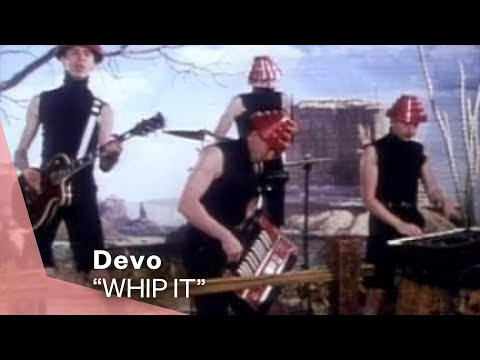

In [16]:
YouTubeVideo('j_QLzthSkfM')

Whenever a wave hits a discontinuity, part of it is transmitted past the discontinuity, and part of it is reflected.
The laws of physics that describe these phenomena are those of Fresnel for refraction and reflection, but are generic to any kind of wave.
In two- or three-dimensions, they can get somewhat complicated, and in this chapter, we stick to what happens to our 1D waves on a string.
In particular: what are the relative amplitudes and phases of the waves that are being transmitted and reflected?

But first of all, what does it mean for our string waves to hit a discontinuity?
The discontinuity is in the phase speed: if the mass density $\mu$ suddenly changes somewhere in the string, the phase speed will change as well.
Let $x=0$ be the location where the two pieces of string attach, $\mu_1$ the mass density for $x<0$ and $\mu_2$ the mass density for $x>0$.
There are two phase speeds then:
$$v_1 = \sqrt\frac{T}{\mu_1}\quad\textrm{for}\quad x<0 \andeq v_2 = \sqrt\frac{T}{\mu_2}\quad\textrm{for}\quad x>0.\hspace{3cm}(3)$$

In order to solve the problem analytically, we can use two boundary conditions where the two pieces of strings attach, i.e., at $x=0$.
The boundary conditions are the following.

1. They must move at the same frequency, amplitude and phase. Otherwise, they would not stay attached:
$$\left.y_1\right|_{x \to 0_-} = \left.y_2\right|_{x \to 0_+}.$$
2. The transverse (along-$y$) forces must match. Otherwise, there is a piece of string of zero mass at the junction to which a non-zero force is applied. The infinite acceleration that ensues is non-physical. The transverse (vertical on the figure) force applied to a piece of string by its neighbor to the right is $T\sin\theta$ (cf. King fig. 5.8, reproduced here), which in the small-angle approximation (cf. chapter 5) is approximately equal to $T\tan\theta = T\pde{y}x$. Because $T$ is constant, then the slopes have to match:
$$\left.\pde{y_1}x\right|_{x \to 0_-} = \left.\pde{y_2}x\right|_{x \to 0_+}.$$

![Fig. 3: King 5.8](String.png)

Let us decide that the operator whips the string from the left ($x<0$) and that it can be written as:
$$ y_I = A_I \cos(\omega t - k_I x), $$
with $k_I >0$ (even though we never considered $k<0$, it could be a possibility).
Therefore, at $x=0$, $y_I = A_I \cos(\omega t)$.

Recalling that there is only one frequency (boundary condition \#1), let us define the displacements due to the transmitted and reflected waves as
$$y_T = A_T\cos(\omega t - k_T x)\andeq y_R = A_R\cos(\omega t + k_R x),$$
respectively.
With $k_T$, $k_R>0$, these forms ensure that the transmitted wave keeps propagating towards the right, and that the transmitted wave travels back towards the left.

In most physics problems, the incident wave is usually the one we have the knowledge of, and therefore, $\omega$, $A_I$ and $k_I$ are known.
Because $\omega = kv$, according to eqn. $(3)$, we have $k_I = k_R = \omega/v_1 = k_1$ and $k_T = \omega/v_2 = k_2$.
The only unknown are therefore $A_R$ and $A_T$, for which we need two equations. 
Fortunately, we have two boundary conditions.

The displacement on $x>0$ is only due to the transmitted wave $y_2 = y_T$, while the displacement on $x<0$ is the sum of the incident and reflected waves, $y_1 = y_R + y_I$. 
The first boundary condition states that we must have $\left.(y_I + y_R\right)|_{x=0} = \left.y_T\right|_{x=0}$ at all times, and in particular, at $t=0$.
Therefore,
$$ A_I + A_R = A_T. \hspace{5cm}(4)$$

For the second boundary condition,
$$ \left.k_1 A_I \sin(\omega t - k_1 x)\right|_{x=0} - \left.k_1 A_R \sin(\omega t + k_1 x)\right|_{x=0} = \left.k_2 A_T \sin(\omega t - k_2 x)\right|_{x=0},$$
which yields, after division by $\sin(\omega t)$:
$$ k_1 (A_I - A_R) = k_2 A_T.  \hspace{5cm}(5)$$

Combining eqns. $(4)$ and $(5)$ yields
$$\frac{A_T}{A_I} = \frac{2 k_1}{k_1 + k_2} = \tau_{12}\andeq\frac{A_R}{A_I} = \frac{k_1 - k_2}{k_1 + k_2} = \rho_{12},$$
$\tau_{12}$ and $\rho_{12}$ are called the **transmission and reflection coefficients**, respectively.

Note that $0\leq \tau_{12} \leq 2$, while $-1\leq \rho_{12} \leq +1$.
To understand these numbers, let us re-write them as
$$\tau_{12} = \frac{2 \sqrt{\mu_1}}{\sqrt{\mu_1} + \sqrt{\mu_2}} \andeq \rho_{12} = \frac{\sqrt{\mu_1} - \sqrt{\mu_2}}{\sqrt{\mu_1} + \sqrt{\mu_2}}.$$

In the limiting case $\mu_2 \to \infty$, $\tau_{12}\to0$ and $\rho_{12} \to -1$: the other string is so heavy it acts as a rigid wall, no wave gets transmitted and the wave is totally reflected, with the amplitude at the junction of the two waves canceling.
Moreover, that $\rho_{12}<0$ means that the *polarity* of the wave changes: an upward-pointing wave reflects as a downward-pointing wave, just like the very first animation of this chapter and just like the rubber hose I used in class.

In [45]:
# Parameters
x_1 =  np.linspace(-L/2, 0., 64)
x_2 =  np.linspace(0., L, 128)
mu_1 = 1*mu
mu_2 = 4*mu_1
v_1 = np.sqrt(T/mu_1)
v_2 = np.sqrt(T/mu_2)
k_1 = 4*np.pi/L
omega = v_1*k_1
k_2 = omega/v_2

tau = 2*k_1/(k_1 + k_2)
rho = (k_1 - k_2)/(k_1 + k_2)

# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([-.5, 1.])
ax.set_ylim([-1.5, 5.1])
ax.axvline(0., color='k', linestyle='--')
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks([0., 2., 4.])
ax.set_yticklabels([r'$y$', r'$y_I$', r'$y_R$'], fontsize=ftsz)
ax.set_title('Case $\mu_2 = 4\mu_1$')
ax.grid()

imagelist = []

for t in time: # We loop over time to animate the modes
    # f and g were defined in the previous animation
    y_I = np.cos(k_1*x_1 - omega*t)
    y_T = tau*np.cos(k_2*x_2 - omega*t)
    y_R = rho*np.cos(k_1*x_1 + omega*t)

    y_1 = y_R + y_I

    y_scat = np.hstack((y_I+2, y_R+4, y_T, y_1))
    x_scat = np.hstack((x_1, x_1, x_2, x_1))
    im = plt.scatter(x_scat/L, y_scat, c=y_scat, cmap='copper')
    imagelist.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=100, blit=True, repeat_delay=80)
plt.close()

In [46]:
# Show the animation
HTML(ani.to_html5_video())

In [51]:
# Save the animation
ani.save('TransmissionReflection_HiMu2.mp4', dpi=100)

When $\mu_2<\mu_1$, then the string is lighter in the transmitted part.
It is therefore not necessarily surprising that the string has a greater amplitude than the incident wave, because equal inertia with less mass means more amplitude. 
However, this does not mean that there is more energy being transported in the transmitted part than the incident wave is providing: as we saw previously, the power transported by the wave is proportional to $A^2$, but also to $\mu\lambda \propto \sqrt{\mu}$ (recall that $1/\lambda \propto k = \omega/v \propto \sqrt{\mu}$).
The transmitted amplitude cannot be higher than twice the incident, while $\mu$ can go all the way to zero: **there is no contradiction with conservation of momentum or energy.**

In [52]:
# Parameters
mu_2 = 0.25*mu_1
v_2 = np.sqrt(T/mu_2)
k_2 = omega/v_2

tau = 2*k_1/(k_1 + k_2)
rho = (k_1 - k_2)/(k_1 + k_2)

# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([-.5, 1.])
ax.set_ylim([-1.5, 5.1])
ax.axvline(0., color='k', linestyle='--')
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks([0., 2., 4.])
ax.set_yticklabels([r'$y$', r'$y_I$', r'$y_R$'], fontsize=ftsz)
ax.set_title('Case $\mu_2 = \mu_1/4$')
ax.grid()

imagelist = []

for t in time: # We loop over time to animate the modes
    # f and g were defined in the previous animation
    y_I = np.cos(k_1*x_1 - omega*t)
    y_T = tau*np.cos(k_2*x_2 - omega*t)
    y_R = rho*np.cos(k_1*x_1 + omega*t)

    y_1 = y_R + y_I

    y_scat = np.hstack((y_I+2, y_R+4, y_T, y_1))
    x_scat = np.hstack((x_1, x_1, x_2, x_1))
    im = plt.scatter(x_scat/L, y_scat, c=y_scat, cmap='copper')
    imagelist.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=100, blit=True, repeat_delay=80)
plt.close()

In [53]:
# Show the animation
HTML(ani.to_html5_video())

In [54]:
# Save the animation
ani.save('TransmissionReflection_LoMu2.mp4', dpi=100)

(Animations saved under ```TransmissionReflection_LoMu2.mp4``` and ```TransmissionReflection_HiMu2.mp4```).
See how in both cases, the addition of a reflected wave makes the wave, left of the discontinuity more "standing-wave-like".

# Travelling Waves in Higher Dimensions

*Note: I will not cover it class because it is relatively simple, but it is part of the testable material.*

For the sake of simplicity, I decided to focus on wave, travelling in a one-dimensional medium.
A lot of what we described translates relatively easily in 2D (taut membrane or Chladni plate) and 3D (volume waves, like seismic waves or sound waves), and some of it does not.
For example, the laws of reflection and transmission become significantly more complicated.

However, I will simply give a sneak peek into what happens in 2D and 3D.
The wave equation in higher dimensions is
$$\pden2ft = v^2\bnabla^2 f.$$
In a 3D Cartesian system of coordinates $(x, y, z)$, the operator $\bnabla^2$ (also called the Laplace operator, or Laplacian) is written
$$\bnabla^2f = \pden2fx + \pden2fy + \pden2fz.$$
In 2D, there are only two second derivatives, and in 1D, $\bnabla^2f = \partial^2 f/\partial x^2$, which is the case we have been treating thus far.

If another geometry requires the use of polar or spherical coordinates, the expression for the Laplacian can become considerably more complicated.

Let me focus on the 2D case in the rest of this section.
Any function $z(\vec r, t) = z(\vec k \cdot \vec r - \omega(k) t)$, with $\vec r = x\unit x, y\unit y$, $\vec k = k_x\unit x + k_y\unit y$, $k = \|\vec k\| = \sqrt{k_x^2 + k_y^2}$ and $\omega(k) = kv$, is now a solution to the 2D waves equation.
Note that I don't need to distinguish between left- and rightward propagating waves anymore: now that $\vec k$ is a vector, its orientation determines the direction of a given wave.

Also note that it is now $k = \|\vec k\|$ that is called the wavenumber.

A solution, which can be written as $z(\vec k \cdot \vec r - \omega(k) t)$ is called a *plane wave*, and I will show in a minute why it is called so.
Any linear combination of plane waves is also a solution.
As a matter of fact, for waves, propagating on a plate of infinite extent, the whole set of plane waves has the role of a basis for the space of solutions, but that's a fine point you don't need to worry about.

A lot can be understood about the solution by just investigating the behaviour of a plane sine wave
$$z(\vec r, t) = A\cos(k_x x + k_y y - \omega t),\quad \textrm{with}\quad \omega = kv.$$

Note how plugging in this solution into the 2D wave equation only works if 
$$\omega^2 = (k_x^2 + k_y^2)v^2 \Rightarrow \omega = kv,$$
which is the 2D equivalent of a fundamental property we have seen many times now.

King has illustrations of what such a wave looks like (King fig. 5.16 and 5.17, reproduced here).

![](King516.png)

At any given instant, the crests of this plane wave are found on the loci of $k_x x + k_y y - \omega t = 2\pi n$, with $n\in \mathbb Z$.
Let us consider the case $t=0$ for now.
Along the $x$-axis ($y = 0$), maxima are found every time $k_x x = 2\pi n$, or every $2\pi/k_x$.
The along-$x$ wavelength is $\lambda_x = 2\pi/k_x$.
Likewise, the along-$y$ wavelength is $\lambda_y = 2\pi/k_y$.

The wavelength, traditionally defined as the shortest distance between two crests, is however $\lambda = 2\pi/k$.
I say "however" because there is no vector $\vec \lambda = \lambda_x \unit x + \lambda_y\unit y$ such that $\lambda = \|\vec\lambda\| =  \sqrt{\lambda_x^2 + \lambda_y^2}$.
In fact, the wavelength $\lambda$ is always shorter than both $\lambda_x$ and $\lambda_y$ (see King fig. 5.17).

![Note that King's $k_1$ is my $k_x$ and his $k_2$is my $k_y$.](King517.png)

Joining the point on the $x$- and $y$-axes is a wave crest.
We could have repeated this story for any value of $z(\vec r, t) = constant$, not just for the maximum.
Any such line (such as a wave crest, that is), is called a wavefront.
Any wavefront is defined by a locus
$$y = -\frac{k_x}{k_y}x + \frac{2\pi n}{k_y},$$
along which $k_x x + k_y y$ and $z(\vec r, t)$ are constant.

The lines of equal phase ($k_x x + k_y y - \omega t = constant$) are straight lines.
In 3D, they would be planes.
This is why such waves are called **plane waves**.
Plane waves need not be sines or cosines: any travelling wave with iso-phase loci that are straight lines in 2D or planes in 3D is called a plane wave.
In the particular case of a sine or cosine, there is only one frequency, and the amplitude of the disturbance does not vary in space.
Therefore, plane sinusoidal waves are often called **monochromatic homogeneous waves (MHWs)**.
Monochromatic means that there is only one frequency, and homogeneous referes to the constant amplitude.

As time increases, and because $v = \omega/k$, the wavefronts propagate along the same direction of $\vec k$, perpendicular to wavefronts, with velocity $v$.
Note that if measurements are taken along any line that is not along $\vec k$, the propagating of the disturbances appears *faster* than $v$.
The phase speed $v$ is by definition the propagation of the phase, or any other disturbance, along $\vec k$.